In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [48]:
# Final - preprocessing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


# visulizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling, stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import math
import sklearn.metrics as sklm
import statsmodels.api as sm

# Model saving
import pickle

In [49]:
modelling=pd.read_csv("../input/vehiclesmodelling/vehiclesModelling.csv")

In [50]:
modelling.drop(["age"],axis=1,inplace=True)
modelling.drop(['state'],axis=1,inplace=True)

modelling.rename(columns={'state_trans':'state'},inplace=True)
modelling

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4,gas,63500.0,clean,manual,4wd,hatchback,black,west
1,13999,2009.0,ram,good,6,gas,120057.0,clean,automatic,4wd,pickup,silver,west
2,34500,2017.0,ford,excellent,6,diesel,95484.0,clean,automatic,4wd,pickup,white,west
3,14500,2007.0,gmc,excellent,6,gas,89340.0,clean,automatic,4wd,pickup,white,west
4,12500,2013.0,ford,salvage,6,gas,226031.0,clean,automatic,4wd,pickup,white,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413642,15476,2012.0,nissan,excellent,6,gas,103135.0,clean,automatic,4wd,SUV,white,west
413643,9881,2008.0,bmw,good,6,gas,108277.0,clean,automatic,2wd,convertible,white,west
413644,24895,2019.0,jeep,like new,4,gas,6973.0,clean,automatic,4wd,SUV,white,west
413645,32500,2017.0,unknown,excellent,6,gas,37520.0,clean,automatic,4wd,sedan,red,west


### Log Transformation of Price

In [52]:
modelling["price"]=np.log1p(modelling["price"])

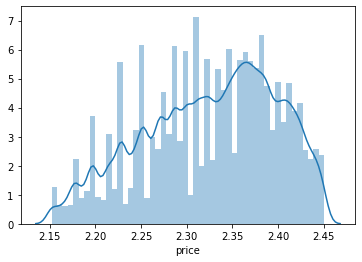

In [53]:
sns.distplot(modelling.price)

### 80-20 Splitting 

In [55]:
y=modelling["price"]
x=modelling.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Normalization

In [56]:
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Ordinal Encoding -Condition

In [57]:
condition_dict={"salvage":0,"fair":1,"good":2,"excellent":3,"like new":4}
x_train["condition"]=x_train.condition.map(condition_dict)
x_test["condition"]=x_test.condition.map(condition_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
x_train["cylinders"].value_counts()

6     201107
4      64043
8      62270
5       1866
10      1202
3        359
12        70
Name: cylinders, dtype: int64

In [60]:
cylinder_dict={3:0,4:1,5:2,6:3,8:4,10:5,12:6}
x_train["cylinders"]=x_train.cylinders.map(cylinder_dict)
x_test["cylinders"]=x_test.cylinders.map(cylinder_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
x_train["cylinders"].value_counts()

3    201107
1     64043
4     62270
2      1866
5      1202
0       359
6        70
Name: cylinders, dtype: int64

In [63]:
x_cylmin=x_train["cylinders"].min()
x_cylmax=x_train["cylinders"].max()
x_train["cylinders"]=((x_train["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))
x_test["cylinders"]=((x_test["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))

x_conmin=x_train["condition"].min()
x_conmax=x_train["condition"].max()
x_train["condition"]=((x_train["condition"]-x_conmin)/(x_conmax-x_conmin))
x_test["condition"]=((x_test["condition"]-x_conmin)/(x_conmax-x_conmin))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [64]:
x_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
301757,0.900000,chevrolet,0.75,0.166667,gas,0.208972,clean,automatic,2wd,sedan,brown,northeast
1334,0.783333,volvo,0.50,0.500000,gas,0.478862,clean,automatic,2wd,sedan,silver,northeast
276948,0.933333,chevrolet,0.25,0.500000,gas,0.489253,clean,automatic,4wd,truck,white,south
344251,0.716667,ford,0.00,0.500000,diesel,0.592654,clean,automatic,4wd,pickup,blue,west
403805,0.850000,honda,0.75,0.500000,gas,0.310706,clean,automatic,4wd,sedan,white,south
...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.866667,chevrolet,1.00,0.500000,gas,0.086893,clean,automatic,2wd,coupe,orange,west
365838,0.783333,mercedes-benz,0.75,0.500000,gas,0.492276,clean,automatic,4wd,sedan,black,northeast
131932,0.766667,chevrolet,0.75,0.666667,gas,0.547425,clean,automatic,4wd,truck,grey,south
146867,0.783333,chevrolet,0.75,0.666667,diesel,0.873332,clean,automatic,2wd,pickup,red,south


### One Hot Encoding

In [65]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

missing_cols=set(x_train.columns)-set(x_test.columns)
for val in missing_cols:
    x_test[val]=0
    
x_test=x_test[x_train.columns]

In [67]:
x_train

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
301757,0.900000,0.75,0.166667,0.208972,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1334,0.783333,0.50,0.500000,0.478862,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
276948,0.933333,0.25,0.500000,0.489253,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
344251,0.716667,0.00,0.500000,0.592654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
403805,0.850000,0.75,0.500000,0.310706,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.866667,1.00,0.500000,0.086893,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
365838,0.783333,0.75,0.500000,0.492276,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
131932,0.766667,0.75,0.666667,0.547425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146867,0.783333,0.75,0.666667,0.873332,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
x_train.to_csv("x_train.csv",index=False)
x_test.to_csv("x_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)